### 6-1. 차원축소 개요

매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것  
  
일반적으로 차원이 증가하면 데이터 간의 거리가 멀어지고(차원의 저주) , 희소한 구조를 갖게 됨  
  - 적은 차원에서 학습된 모델보다 상대적으로 예측 신뢰도가 떨어짐  
  - 피처가 많은 경우 개별 피처간에 상관관계가 높을 가능성 존재 => 다중 공선성으로 인한 예측 성능 저하 우려  
  ==> 차원 축소하여 피처의 수를 줄이면 더 직관적으로 데이터 해석 가능    
        
  - 수십개 이상의 피처는 시각적으로 표현해 특성을 파악하기 힘드므로 3차원 이하 차원 축소를 통해 시각적으로 데이터 압축하여 표현
  => 쉽게 데이터 패턴 인지 가능, 학습 데이터 크기가 줄어들어 학습에 필요한 처리 능력 줄일 수 있음

차원축소는 피처 선택과 피처 추출로 나누어짐
- 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
- 피처(특성) 추출 : 기존 피처를 저차원의 중요 피처로 압축해서 추출  
 -연관 효과가 큰 편  
 -기존 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 되며, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출함  
 -기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것  
 -이미지, 텍스트처럼 많은 차원을 갖고 있는 곳에서 잘 활용


### 6-2. PCA(주성분 분석)

- 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터 축소
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- PCA로 차원 축소 시 기존 데이터의 정보 유실이 최소화됨
  
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 => PCA의 주성분 (∴분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)

![6-1](img6/6-1.png)
![6-2](img6/6-2.png)

- 차원 축소 방법 : 데이터 변동성이 가장 큰 방향으로 축 생성 -> 두번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 -> 세번째 축은 다시 두번째 축과 직각이 되는 벡터 ->... ->새롭게 생성된 축으로 데이터 투영
 
- PCA는 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법

- 선형대수 관점에서 해석해보면, 입력 데이터의 공분산 행렬을 고유값 분해하고 이렇게 구한 고유 벡터에 입력 데이터를 선형변환하는 것
- 여기서 이 고유 벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄

![6-3](img6/6-3.png)
![6-4](img6/6-4.png)
 -고유값은 고유벡터의 크기 & 입력 데이터의 분산

※선형 변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것 = 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념( 이 경우 행렬은 공간)

※고유벡터 : 행렬을 곱해도 방향은 변하지 않고 크기만 변하는 벡터 (Ax = ax)

- 고유벡터는 여러개가 존재하며 , 정방 행렬은 최대 차원수만큼 고유벡터 가질 수 있음

※공분산 행렬은 정방행렬이며 대칭행렬 / 개별 분산값을 대각 원소로 하는 대칭행렬

- 대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있다
![6-5](img6/6-5.png)

=> 공분산 C는 고유벡터 직교행렬 * 고유값 정방 행렬 * 고유벡터 직교행렬의 전치행렬로 분해됨

- 고유벡터 e에서 e1은 가장 분산이 큰 방향을 가진 고유벡터
- 고유값  λi 는 i번째 고유벡터의 크기
![6-64](img6/6-6.png)
∴입력 데이터의 공분산 행렬이 고유 벡터와 고유값으로 분해되며 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형변환하는 것이 PCA

-PCA과정
1) 입력 데이터 세트의 공분산 행렬을 생성  
2) 공분산 행렬의 고유벡터와 고유값 계산  
3) 고유값이 가장 큰 순으로 K개 만큼 고유벡터 추출  
4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환


붓꽃 데이터를 이용해 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포되어 있는지 2차원으로 시각화

sepal length와 sepal width를 X,Y 축으로 해 품종 데이터 분포를 나타냄

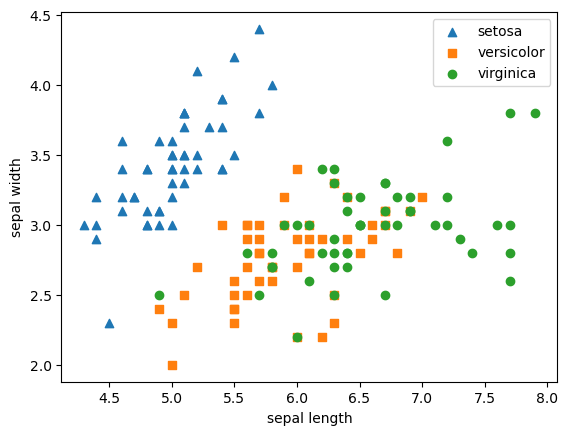

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- PCA를 적용하기 전 개별 속성을 함께 스케일링 해야함
- PCA는 여러 속성의 값을 연산하므로 속성의 스케일에 영향 받음
- 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것 필요

StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 속성값 변환

In [5]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

PCA로 4개의 속성을 2개로 압축한 뒤 2차원으로 시각화

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화

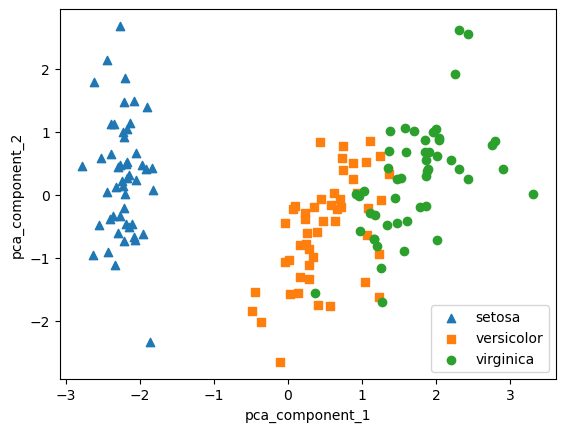

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

=>versicolor과 virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 존재하긴 하지만 그래도 잘 구분된 것을 볼 수 있다
PCA Component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아본다

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


=> 첫번째 PCA 변환 요소는 전체 변동성의 약 72.9%를 차지하며, 두번째는 약 22.8%를 차지

그러므로 PCA를 2개의 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다

원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [12]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


=> 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없다 (10% 하락)   
PCA를 이용하면 성능은 떨어지지만 데이터를 명확하게 표현하는 방향성을 제공해준다

![6-7](img6/6-7.png)
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
    
UCI에서 제공하는 신용카드 고객 데이터 세트를 이용해 PCA 변환  

In [15]:
import pandas as pd

df = pd.read_excel('train/credit_card.xls', sheet_name='Data')
print(df.shape)
df.head(3)

(30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


맨 마지막 열에 있는 default payment next month가 target값으로 다음달 연체 여부를 의미

0인경우 정상납부, 1인 경우 연체를 의미

In [29]:
# header로 의미없는 첫행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [30]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [31]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

=>타겟값과 피처 데이터를 분리

각 속성끼리의 상관도를 파악하기 위해 heatmap으로 시각화

<AxesSubplot:>

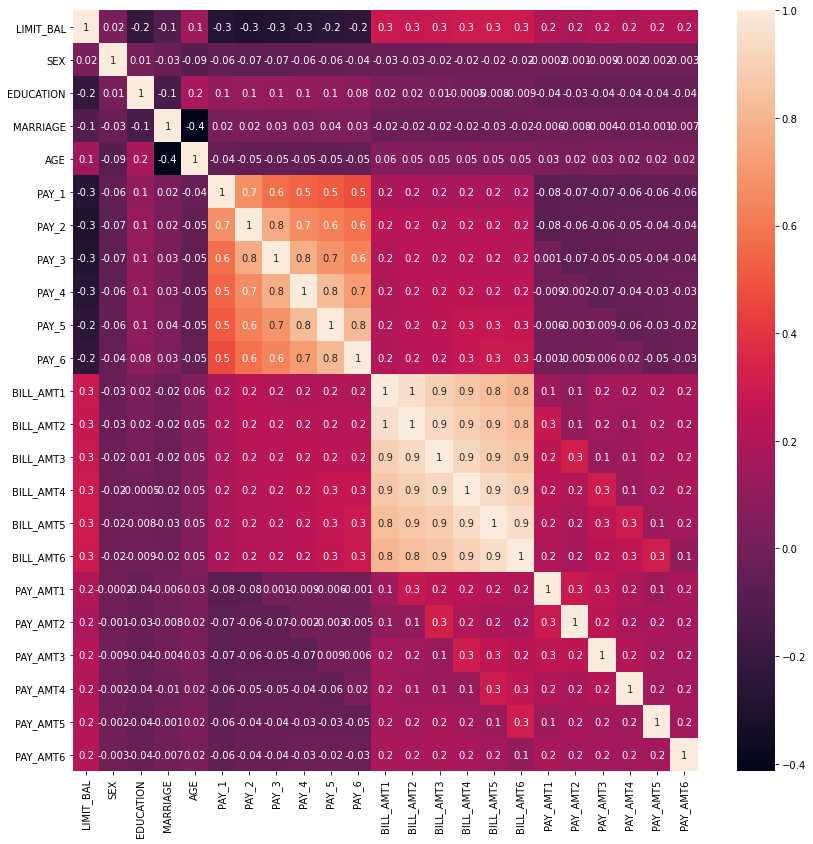

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT 속성 6개가 대부분 0.9 이상의 상관도로 매우 높음을 알 수 있다

PAY_AMT 속성들도 나름 상관도가 높은 편이다

이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다

BILL_AMT 속성들을 2개의 Component로 PCA변환한 뒤 개별 컴포넌트의 변동성을 알아본다

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)
cols_bill.extend(cols_pay)
cols_bill.extend(cols_amt)
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
PCA Component별 변동성: [0.36180187 0.20618472]


=>2개의 컴포넌트 만으로도 6개 속성의 변동성을 95%정도 설명 가능하다

이번에는 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교

In [35]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7901 0.7967 0.804 ]
PCA 변환 데이터 셋 평균 정확도:0.7969


=> 전체 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 2% 정도의 예측 성능 저하만 발생하였다

전체 속성의 1/4만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것이라 생각됨

### 6-3. LDA(Linear Discriminant Analysis)

- 선형 판별 분석법으로 불리며 PCA와 매우 유사
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원축소
- PCA는 입력 데이터의 변동성의 가장 큰 축을 찾는다면, LDA는 입력 데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾음

- LDA는 특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소
 => 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게
![6-9](img6/6-9.png)
- 공분산 행렬을 사용하는 PCA와 달리 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영함  
  
- LDA 구하는 과정

1) 클래스 내부와 클래스 간 분산 행렬을 구함. 2개의 행렬은 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터를 기반으로 구함  
2) 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb 이라 할 때 이는 고유 벡터로 분해가 가능하다
![6-10](img6/6-10.png)
3) 고유값이 가장 큰 순으로 K개 추출  
4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

이제 붓꽃 데이터 세트에 LDA를 적용

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

LDA는 지도학습 ! => 클래스의 결정값이 변환 시에 필요함

In [38]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


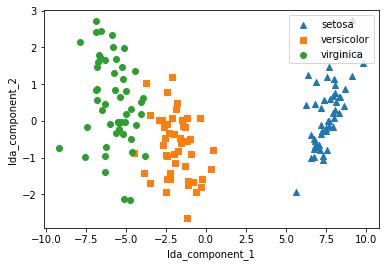

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

=> LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

### 6-4. SVD(Singular Value Decomposition)

#### SVD 개요

- 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 행렬 분해 기법 사용가능

![6-11](img6/6-11.png)

- 특이값 분해로 불리며, 행렬 U와 V에 속하는 벡터는 특이벡터 , ∑는 대각행렬
- 특이 벡터는 서로 직교하는 성질 가짐
- ∑이 위치한 0이 아닌 값이 행렬의 특이값

![6-12](img6/6-12.png)

=> Full SVD

- full SVD 이외에도 Compact SVD, Truncated SVD 도 존재

- Compact SVD : ∑의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 이에 해당하는 U와 V의 원소도 함께 제거해 차원을 줄인 형태
![6-13](img6/6-13.png)
- Truncated SVD : ∑의 대각원소 중에 상위 몇개만 추출


- 차원 축소 행렬분해된 후 다시 분해된 행렬을 이용해 원복된 데이터셋을 잡음(noise)이 제거된 형태로 재구성

In [40]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이 행렬에 SVD를 적용해 U, sigma, V T 도출

In [41]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 이 행렬들을 이용해 원본 행렬로 복원되는지 확인

원본 행렬은 u,sigma,vt를 내적하면 됨

In [42]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


=>원본행렬과 동일하게 복원됨을 알 수 있다

데이터 세트가 로우 간 의존성이 있을 경우 sigma 값이 어떻게 변하고, 차원 축소가 어떻게 진행될 수 있는지 알아본다

※의존성을 위해 a행렬의 3번째 로우를 1번째+2번째 로우로 설정하고 ,4번째=1번째 로우로 설정

In [43]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [44]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


=>sigma 2개가 0으로 변했다 = 선형 독립인 로우 벡터의 개수가 2개(행렬의 rank가 2)

sigma의 0에 대응되는 u,sigma,vt를 제외한 데이터를 이용해 행렬 복원

In [45]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이번에는 Truncated SVD를 이용해 행렬 분해

Truncated 분해는 상위 일부 데이터를 추출하는 것으로 인위적으로 더 작은 차원으로 분해하는 것이기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없음

※Truncated SVD 연산은 사이파이 모듈에서만 지원됨

In [46]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

#### 사이킷런 TruncatedSVD 클래스를 이용한 변환
사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit,transform을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환함


Text(0, 0.5, 'TruncatedSVD Component 2')

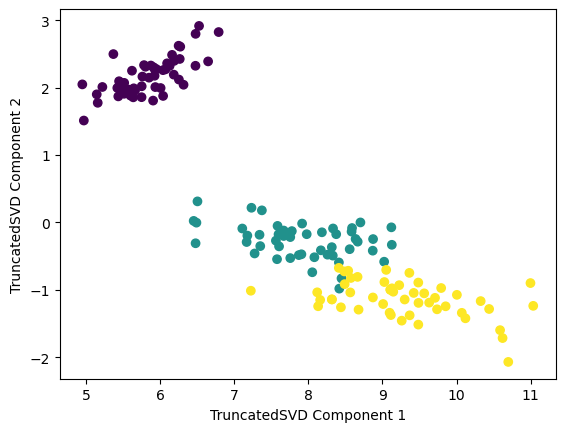

In [13]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

=> PCA 변환과 유사하게 변환 후에 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성 가짐

Text(0.5, 1.0, 'PCA Transformed')

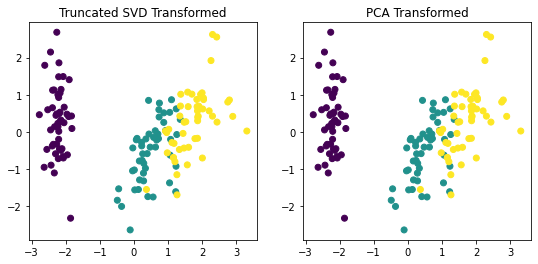

In [48]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

=> 스케일링으로 변환한 뒤 TruncatedSVD와 PCA 클래스 변환을 해보면 두개가 거의 동일함을 볼 수 있음  
·두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해보면 거의 같음을 알 수 있다

In [49]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3257553290652785e-15
-1.3357370765021415e-16


=> 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다

∴데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환 수행

 => PCA가 SVD 알고리즘으로 구현되었음을 의미

### 6-5. NMF(Non-Negative Matrix Factorization)

낮은 랭크를 통한 행렬 근사 방식의 변형

·원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 더 간단하게 두개의 기반 양수 행렬로 분해될 수 있는 기법
![6-14](img6/6-14.png)
 -행렬분해를 하게 되면 일반적으로 길고 가는 행렬 W, 작고 넓은 행렬 H로 분해됨

 -이렇게 분해된 행렬은 잠재 요소를 특성으로 가짐


-분해 행렬 W : 원본 행에 대해 이 잠재 요소의 값이 얼마나 되는지 대응

-분해 행렬 H : 이 잠재 요소가 원본 열로 어떻게 구성됐는지 나타내는 행렬


![6-15](img6/6-15.png)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

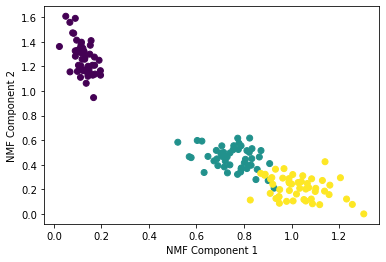

In [50]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')


·NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용됨